<a href="https://colab.research.google.com/github/waqqasansari/Coursera_Capstone/blob/master/Capstone_Coursera_The_Battle_of_Neighborhoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project - The Battle of the Neighborhoods
##Applied Data Science Capstone by IBM/Coursera

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an **South indian** in **New Delhi**, India.

Since there are lots of restaurants in New Delhi we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **areas with no South indian in vicinity**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of and distance to South indian restaurants in the neighborhood, if any
* distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

* For this project we will use [Kaggle Zomato dataset](https://https://www.kaggle.com/shrutimehta/zomato-restaurants-data). This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**


In [1]:
!pip install pyproj

     |████████████████████████████████| 6.5MB 6.7MB/s 


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

     |████████████████████████████████| 102kB 4.7MB/s 


#Load csv file into pandas dataframe

In [4]:
df = pd.read_csv('/content/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]

##Select only New Delhi and India data from the dataset

In [5]:
df_india = df[df['Country Code'] == 1]
df_delhi = df_india[df_india['City'] == 'New Delhi']
df_delhi.reset_index(drop=True, inplace=True)
df_delhi.head()

Restaurant ID  Restaurant Name  Country Code  ... Rating color Rating text Votes
0       18287358       Food Cloud             1  ...        White   Not rated     2
1       18216944        Burger.in             1  ...       Orange     Average    46
2         313333  Days of the Raj             1  ...       Orange     Average    45
3       18384127   Dilli Ka Dhaba             1  ...       Orange     Average    11
4            582        Govardhan             1  ...       Orange     Average   238

[5 rows x 21 columns]

#Cleaning of data
remove unwanted values and columns from the dataset

In [6]:
df_new = df_delhi[df_delhi.Longitude !=0.000000][['Restaurant Name',
                                               'Locality','Longitude',
                                               'Latitude','Cuisines',
                                               'Aggregate rating',
                                               'Rating text','Votes']]


In [7]:
df_new = df_new[df_new['Aggregate rating'] != 0.0]

In [8]:
df_new.head()

Restaurant Name Locality  Longitude  ...  Aggregate rating Rating text  Votes
1        Burger.in  Adchini  77.196923  ...               3.2     Average     46
2  Days of the Raj  Adchini  77.197475  ...               3.4     Average     45
3   Dilli Ka Dhaba  Adchini  77.198033  ...               2.6     Average     11
4        Govardhan  Adchini  77.196924  ...               3.4     Average    238
5   Mezbaan Grills  Adchini  77.198122  ...               3.1     Average      8

[5 rows x 8 columns]

In [9]:
df_new.shape

(3975, 8)

##Get the latitude and longitude of New Delhi

In [10]:
from geopy.geocoders import Nominatim

In [11]:
def get_latlong(city, country):
  geolocator = Nominatim(user_agent="my_user_agent")
  loc = geolocator.geocode(city+','+ country)
  lat, lon = loc.latitude, loc.longitude
  return lat, lon

In [12]:
delhi_center = get_latlong("New Delhi", 'India')
delhi_center

(28.6138954, 77.2090057)

#created map to show the restaurant cluters

In [13]:
New_Delhi_Rest = folium.Map(location=delhi_center, zoom_start=12)

X = df_new['Latitude']
Y = df_new['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_new ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_new['Latitude'], df_new['Longitude'], df_new['Locality'], df_new['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

#What places are have best restaurant in New Delhi?

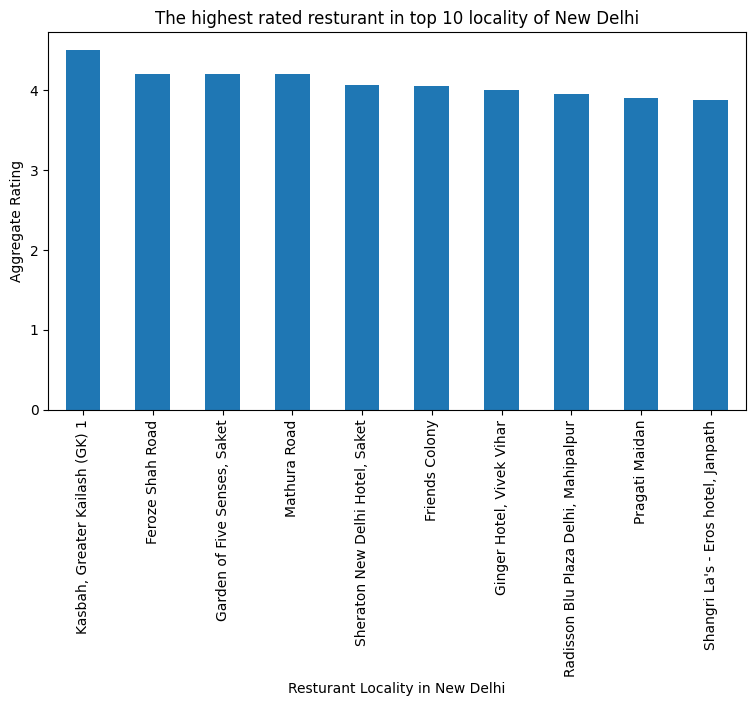

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_new.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in Kesbah, Greater Kailash area.

#what places are have worst restaurants in New Delhi?

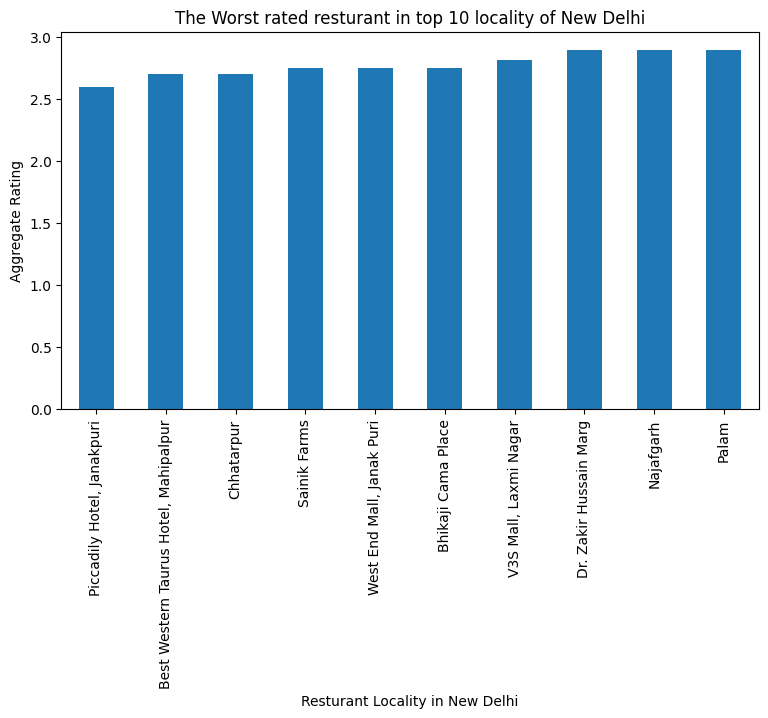

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_new.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in Piccadily Hotel, Janakpuri.

#Area that have highest numbers of Resturant

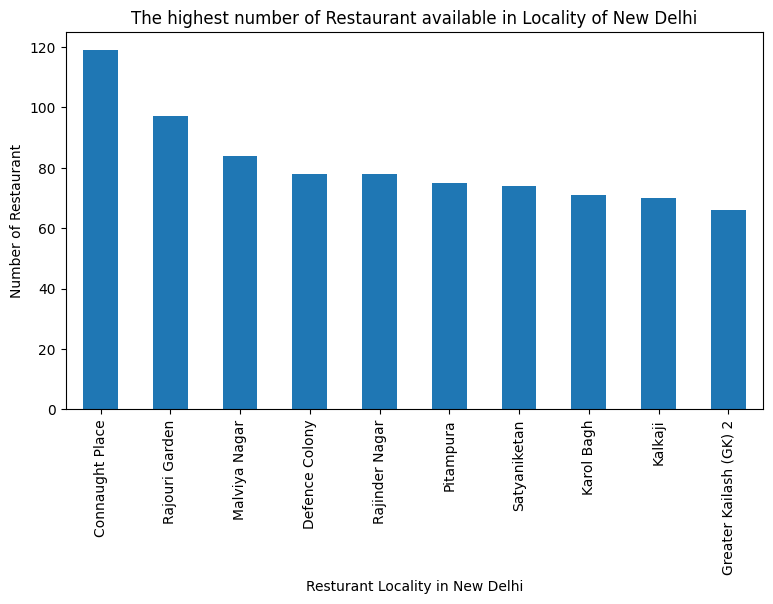

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_new.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Cannaught palace have maximum numbers of resturant

#Which area have least numbers of Resturant

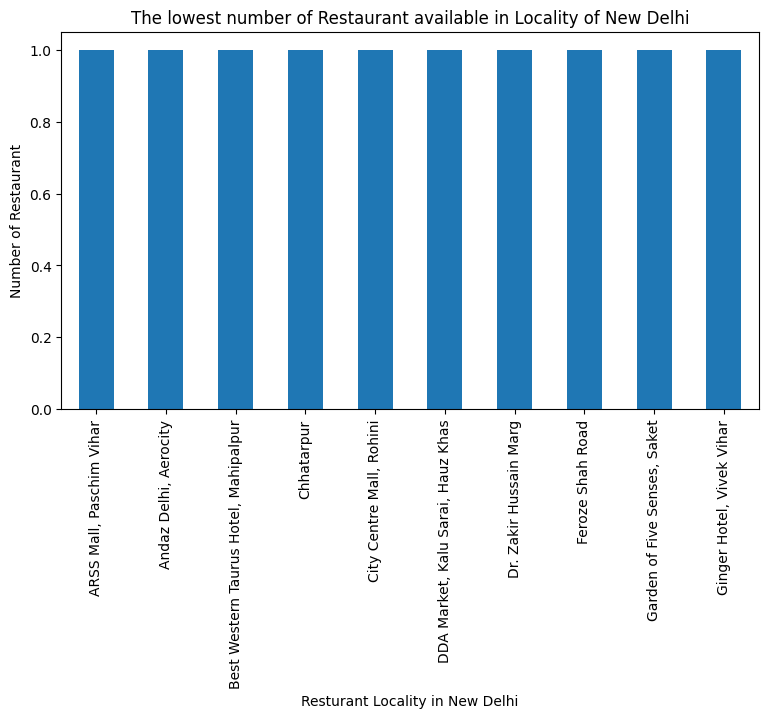

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_new.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

In [18]:
df_new

Restaurant Name     Locality  Longitude  ...  Rating text Votes  Cluster
1            Burger.in      Adchini  77.196923  ...      Average    46        1
2      Days of the Raj      Adchini  77.197475  ...      Average    45        1
3       Dilli Ka Dhaba      Adchini  77.198033  ...      Average    11        1
4            Govardhan      Adchini  77.196924  ...      Average   238        1
5       Mezbaan Grills      Adchini  77.198122  ...      Average     8        1
...                ...          ...        ...  ...          ...   ...      ...
5445   Sona Restaurant  Yusuf Sarai  77.207269  ...      Average    30        1
5446             Uraki  Yusuf Sarai  77.213345  ...      Average     8        4
5447        Wah Ji Wah  Yusuf Sarai  77.207476  ...      Average    25        1
5448  Annapurna Sweets  Yusuf Sarai  77.207147  ...         Good   109        1
5449         Karnataka  Yusuf Sarai  77.207237  ...         Good   334        1

[3975 rows x 9 columns]

#which places are the best South indian resturants in New Delhi?

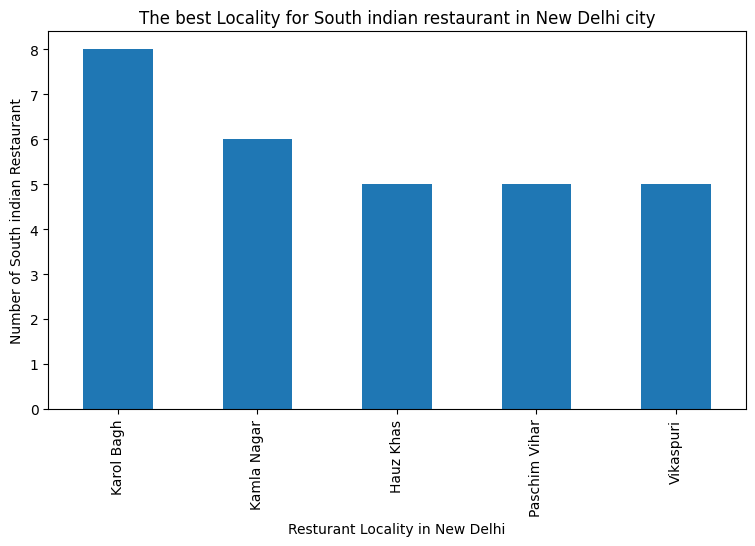

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for South indian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_new[df_new['Cuisines'].str.startswith('South')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of South indian Restaurant')

#displays the plot
plt.show()

karol bagh have the highest number of South Indian resturant

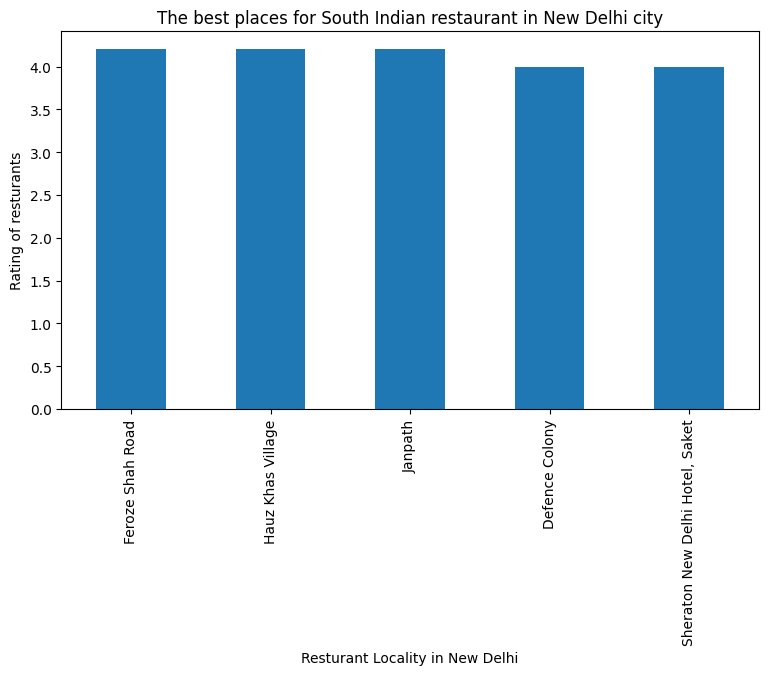

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for South Indian restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_new[df_new['Cuisines'].str.startswith('South')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Feroz Shah Road is the best place for the South Indian resturant follwed by Hauz Jhas Village and Janpath

#Data transformation
Based on Locality grouping the data

In [21]:
df_Res_Loc =  df_new.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_new.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_new.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_new.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_new.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_new.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_new.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [22]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality  ...  No_of_Votes
0       ARSS Mall, Paschim Vihar  ...          117
1                        Adchini  ...         1560
2  Aditya Mega Mall, Karkardooma  ...          434
3                       Aerocity  ...           59
4  Aggarwal City Mall, Pitampura  ...          126

[5 rows x 8 columns]

In [23]:
df_final.shape

(240, 8)

#Define Foursquare Credentials and Version

In [24]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'E504ZK50AUW1NLSMERAQLZJFONHE13LFBY1EIDQ0WLAD0V2S' # Foursquare ID
CLIENT_SECRET = 'VJWVDT4S40HYLXHHCDEPCE1FV3S4CW0MEVN4BOLV03ZRKLXY' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E504ZK50AUW1NLSMERAQLZJFONHE13LFBY1EIDQ0WLAD0V2S
CLIENT_SECRET:VJWVDT4S40HYLXHHCDEPCE1FV3S4CW0MEVN4BOLV03ZRKLXY


In [25]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [27]:
new_Delhi_venues.head()

Locality  ...      Venue Category
0  ARSS Mall, Paschim Vihar  ...      Sandwich Place
1  ARSS Mall, Paschim Vihar  ...         Pizza Place
2  ARSS Mall, Paschim Vihar  ...         Coffee Shop
3  ARSS Mall, Paschim Vihar  ...   Indian Restaurant
4  ARSS Mall, Paschim Vihar  ...  Chinese Restaurant

[5 rows x 7 columns]

In [28]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  ...  Venue Category
Locality                                           ...                
ARSS Mall, Paschim Vihar                        9  ...               9
Adchini                                         6  ...               6
Aditya Mega Mall, Karkardooma                  10  ...              10
Aerocity                                        7  ...               7
Aggarwal City Mall, Pitampura                   4  ...               4
...                                           ...  ...             ...
West Gate Mall, Rajouri Garden                 16  ...              16
West Patel Nagar                                4  ...               4
Worldmark 1, Aerocity                          27  ...              27
Yusuf Sarai                                    12  ...              12
ibis New Delhi, Aerocity                       25  ...              25

[238 rows x 6 columns]

In [29]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [30]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  ...  Wings Joint  Women's Store
0  ARSS Mall, Paschim Vihar    0  ...            0              0
1  ARSS Mall, Paschim Vihar    0  ...            0              0
2  ARSS Mall, Paschim Vihar    0  ...            0              0
3  ARSS Mall, Paschim Vihar    0  ...            0              0
4  ARSS Mall, Paschim Vihar    0  ...            0              0

[5 rows x 210 columns]

In [31]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  ...  Wings Joint  Women's Store
0          ARSS Mall, Paschim Vihar  0.111111  ...          0.0            0.0
1                           Adchini  0.000000  ...          0.0            0.0
2     Aditya Mega Mall, Karkardooma  0.000000  ...          0.0            0.0
3                          Aerocity  0.000000  ...          0.0            0.0
4     Aggarwal City Mall, Pitampura  0.000000  ...          0.0            0.0
..                              ...       ...  ...          ...            ...
233  West Gate Mall, Rajouri Garden  0.000000  ...          0.0            0.0
234                West Patel Nagar  0.000000  ...          0.0            0.0
235           Worldmark 1, Aerocity  0.000000  ...          0.0            0.0
236                     Yusuf Sarai  0.000000  ...          0.0            0.0
237        ibis New Delhi, Aerocity  0.000000  ...          0.0            0.0

[238 rows x 210 columns]

In [32]:
New_Delhi_grouped.shape

(238, 210)

In [33]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2              Chinese Restaurant  0.11
3  Multicuisine Indian Restaurant  0.11
4                          Market  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.33
1               Café  0.33
2                Pub  0.17
3         Restaurant  0.17
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1        Pizza Place   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                 venue  freq
0                Hotel  0.29
1  Rental Car Location  0.14
2       Airport Lounge  0.14
3          Coffee Shop  0.14
4     Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0          Multiplex  0.25
1   Department Store  0.25
2  Indian Restaurant  0.25
3   

In [34]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality  ... 10th Most Common Venue
0          ARSS Mall, Paschim Vihar  ...    Fried Chicken Joint
1                           Adchini  ...             Food Court
2     Aditya Mega Mall, Karkardooma  ...             Food Truck
3                          Aerocity  ...    Fried Chicken Joint
4     Aggarwal City Mall, Pitampura  ...             Food Truck
..                              ...  ...                    ...
233  West Gate Mall, Rajouri Garden  ...            Snack Place
234                West Patel Nagar  ...             Food Court
235           Worldmark 1, Aerocity  ...          Train Station
236                     Yusuf Sarai  ...             Food Court
237        ibis New Delhi, Aerocity  ...    Japanese Restaurant

[238 rows x 11 columns]

In [36]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [39]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality  ...  10th Most Common Venue
0       ARSS Mall, Paschim Vihar  ...     Fried Chicken Joint
1                        Adchini  ...              Food Court
2  Aditya Mega Mall, Karkardooma  ...              Food Truck
3                       Aerocity  ...     Fried Chicken Joint
4  Aggarwal City Mall, Pitampura  ...              Food Truck

[5 rows x 19 columns]

In [40]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue    10th Most Common Venue
5    28.700516    3.040000  ...   Dumpling Restaurant       Fried Chicken Joint
11   28.562580    3.750000  ...   Fried Chicken Joint         French Restaurant
15   28.691136    3.390909  ...   Fried Chicken Joint         French Restaurant
22   28.654105    3.085714  ...            Food Truck                Food Court
90   28.642755    3.450000  ...          Liquor Store                Smoke Shop
94   28.538153    3.117143  ...    Frozen Yogurt Shop       Fried Chicken Joint
101  28.667644    3.300000  ...   Fried Chicken Joint         French Restaurant
104  28.656263    3.097619  ...            Food Truck                Food Court
130  28.724100    3.133333  ...    Frozen Yogurt Shop              Dessert Shop
132  28.706295    3.256000  ...    Frozen Yogurt Shop       Fried Chicken Joint
160  28.712975    3.066667  ...            Food Truck                Food Court
169  28.667261    3.200000  ...   Fried Chicken Joint         French Restaurant
180  28.534499    3.000000  ...            Food Court         Food & Drink Shop
218  28.552403    3.833333  ...           Karaoke Bar                     Hotel
224  28.636921    2.819231  ...                   Gym  Mediterranean Restaurant
230  28.658041    3.400000  ...    Frozen Yogurt Shop       Fried Chicken Joint
234  28.630044    2.750000  ...         Metro Station                 BBQ Joint

[17 rows x 15 columns]

In [42]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue     10th Most Common Venue
6    28.527088    3.117391  ...   Fried Chicken Joint          French Restaurant
7    28.541298    3.425000  ...    Chinese Restaurant                     Lounge
14   28.693969    3.378571  ...     French Restaurant                 Food Truck
18   28.696302    3.300000  ...     French Restaurant                 Food Truck
29   28.681233    3.300000  ...   Fried Chicken Joint          French Restaurant
..         ...         ...  ...                   ...                        ...
223  28.619954    2.905714  ...            Food Court          Food & Drink Shop
225  28.524070    3.686364  ...    Frozen Yogurt Shop        Fried Chicken Joint
227  28.559704    3.278261  ...            Donut Shop  Middle Eastern Restaurant
231  28.637492    3.062264  ...     French Restaurant                 Food Truck
232  28.667344    3.077273  ...           Gaming Cafe                 Donut Shop

[79 rows x 15 columns]

In [43]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ...     9th Most Common Venue  10th Most Common Venue
3    28.553077    3.200000  ...         Fish & Chips Shop     Fried Chicken Joint
10   28.554807    3.000000  ...                    Bakery              Restaurant
12   28.641698    3.050000  ...         French Restaurant              Food Truck
19   28.548827    2.700000  ...             Women's Store              Food Truck
25   28.495624    2.700000  ...        Frozen Yogurt Shop     Fried Chicken Joint
35   28.590297    3.350000  ...          Department Store     Dumpling Restaurant
56   28.570246    4.050000  ...                Food Truck              Food Court
60   28.665829    4.000000  ...       Fried Chicken Joint       French Restaurant
69   28.550327    3.300000  ...                    Bakery           Train Station
70   28.590654    3.550000  ...          Department Store             Pizza Place
71   28.641003    3.650000  ...        Frozen Yogurt Shop     Fried Chicken Joint
72   28.705700    3.350000  ...        Frozen Yogurt Shop     Fried Chicken Joint
74   28.621267    3.416667  ...  Mediterranean Restaurant           Metro Station
83   28.552895    3.300000  ...             Train Station     Japanese Restaurant
111  28.618772    3.666667  ...              Cocktail Bar    Gym / Fitness Center
112  28.552036    3.500000  ...             Train Station     Japanese Restaurant
119  28.545033    2.960000  ...         Indian Restaurant       Accessories Store
128  28.608252    2.945000  ...                Food Court       Food & Drink Shop
148  28.642402    3.195652  ...                      Café          Clothing Store
161  28.639872    3.134483  ...                Food Truck       Fish & Chips Shop
162  28.725814    3.050000  ...                Food Court       Food & Drink Shop
167  28.599082    2.900000  ...                Food Truck              Food Court
168  28.543814    3.950000  ...        Frozen Yogurt Shop     Fried Chicken Joint
173  28.714176    3.352083  ...                Food Truck              Food Court
188  28.707685    3.168182  ...        Falafel Restaurant       French Restaurant
196  28.680905    3.320000  ...             Grocery Store                    Café
204  28.597038    3.533333  ...               Bus Station              Smoke Shop
212  28.592147    3.350000  ...       Arts & Crafts Store          Shop & Service
216  28.594859    3.800000  ...                Restaurant                  Lounge
219  28.638846    3.048148  ...                Food Court       Food & Drink Shop
235  28.652978    3.500000  ...                 Multiplex             Snack Place
237  28.550257    3.220000  ...                    Bakery           Train Station

[32 rows x 15 columns]

In [44]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  ...         10th Most Common Venue
0    28.668945  ...            Fried Chicken Joint
2    28.656131  ...                     Food Truck
13   28.690182  ...         Furniture / Home Store
23   28.656414  ...  Vegetarian / Vegan Restaurant
24   28.649658  ...         Furniture / Home Store
26   28.538688  ...                     Food Court
33   28.657388  ...                     Food Truck
36   28.692546  ...                    Pizza Place
42   28.576161  ...                    Event Space
43   28.643320  ...              Food & Drink Shop
44   28.574288  ...        South Indian Restaurant
46   28.573241  ...                     Food Court
47   28.681582  ...            Fried Chicken Joint
49   28.602169  ...                           Food
55   28.617102  ...              Food & Drink Shop
59   28.654883  ...                     Food Court
61   28.668181  ...             Frozen Yogurt Shop
65   28.556980  ...           Fast Food Restaurant
76   28.576785  ...              French Restaurant
77   28.631728  ...           Fast Food Restaurant
84   28.630942  ...             Frozen Yogurt Shop
85   28.648885  ...         Furniture / Home Store
92   28.584294  ...              French Restaurant
97   28.662972  ...                     Food Court
98   28.651527  ...              French Restaurant
99   28.648795  ...                     Restaurant
113  28.541242  ...            Fried Chicken Joint
116  28.486576  ...              French Restaurant
118  28.646549  ...                     Food Court
124  28.521760  ...                     Food Truck
126  28.602860  ...         Furniture / Home Store
133  28.708185  ...                     Food Court
142  28.693270  ...                    Pizza Place
144  28.591092  ...            Fried Chicken Joint
152  28.544464  ...             Frozen Yogurt Shop
155  28.669160  ...              French Restaurant
157  28.629505  ...             Light Rail Station
159  28.613748  ...            Fried Chicken Joint
164  28.668055  ...              French Restaurant
172  28.644281  ...                           Food
177  28.511482  ...              French Restaurant
193  28.569983  ...              Food & Drink Shop
198  28.636712  ...                     Food Truck
201  28.651299  ...                      Nightclub
203  28.601187  ...       Mediterranean Restaurant
208  28.562469  ...                 Sandwich Place
210  28.661133  ...                     Food Court
214  28.561105  ...                    Coffee Shop
222  28.628988  ...                     Food Truck
236  28.648177  ...                     Food Court

[50 rows x 15 columns]

In [45]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  ...          10th Most Common Venue
1    28.537063  ...                      Food Court
4    28.690020  ...                      Food Truck
8    28.555599  ...                   Women's Store
9    28.659870  ...                      Food Truck
16   28.630440  ...                   Women's Store
17   28.557846  ...       Middle Eastern Restaurant
20   28.568193  ...              Italian Restaurant
21   28.589797  ...                      Food Truck
27   28.716874  ...             Fried Chicken Joint
28   28.650254  ...             American Restaurant
30   28.561898  ...                     Coffee Shop
31   28.632091  ...           Portuguese Restaurant
45   28.696802  ...              Italian Restaurant
58   28.514237  ...          Furniture / Home Store
62   28.550319  ...                    Dessert Shop
63   28.535531  ...                     Pizza Place
64   28.538014  ...                Asian Restaurant
68   28.554275  ...             American Restaurant
75   28.569040  ...              Italian Restaurant
78   28.597665  ...                          Lounge
79   28.631930  ...               French Restaurant
81   28.536611  ...                          Bakery
82   28.548371  ...               French Restaurant
86   28.624632  ...                      Food Truck
89   28.539003  ...             Fried Chicken Joint
91   28.556503  ...       Middle Eastern Restaurant
100  28.556869  ...                          Lounge
102  28.600492  ...                      Restaurant
108  28.563827  ...          Furniture / Home Store
114  28.584615  ...      Modern European Restaurant
120  28.673708  ...               French Restaurant
121  28.702381  ...               Food & Drink Shop
123  28.626791  ...                   Women's Store
127  28.619410  ...               French Restaurant
135  28.579641  ...                      Food Court
140  28.627959  ...               Food & Drink Shop
143  28.564494  ...                           Diner
146  28.535040  ...                             NaN
158  28.700027  ...               French Restaurant
163  28.552711  ...              Punjabi Restaurant
165  28.539464  ...             Fried Chicken Joint
170  28.643757  ...  Multicuisine Indian Restaurant
171  28.639604  ...             Fried Chicken Joint
174  28.550802  ...             Japanese Restaurant
175  28.546931  ...              Frozen Yogurt Shop
179  28.572117  ...         Comfort Food Restaurant
181  28.571849  ...                      Food Court
189  28.620715  ...                    Cocktail Bar
190  28.577107  ...                      Food Court
200  28.564288  ...              Frozen Yogurt Shop
202  28.646593  ...               Fish & Chips Shop
206  28.538993  ...                             Bar
207  28.625445  ...                     Beer Garden
209  28.631362  ...               French Restaurant
213  28.623619  ...                     Snack Place
215  28.605069  ...                      Food Truck
226  28.525054  ...               Food & Drink Shop
228  28.596073  ...               Food & Drink Shop
229  28.692519  ...                      Food Truck
233  28.695096  ...                             NaN

[60 rows x 15 columns]

#Conclusion


1.   karol bagh, Kamla Nagar, Hauz Khas have the best South Indian resturant
2.   Feroz Shah Road is the best place for the South Indian resturant follwed by Hauz Jhas Village and Janpath
1.   Cannaugth Palace is the highest density resturant area
1.   Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
2.   Cluater-1 Shows that the most common venue is the 'Indian Resturant' so it is recommended for those who lives Indian reaturant
2.   Cluster 2 is shows the most common venues are Hotel, Lounge, Indian Resturant etc
1.   Cluster 4 It is most recommended for the Cafe and Bars
2.   Cluster 5 It is most recommended for the Pizza Place







